  <center> <font color = "Blue"> <span style = "font-family : 'Times New Roman' ; font-size: 34pt ; line-height: 1.5" <h1><b> Projet Deep Learning <br> Prédiction du prix de l'action IBM en temps réel  </span> </b></h1></font> </center> 

 <center> <span style = "font-family: 'Times New Roman' ; font-size: 12pt"> Le 21 Novembre 2024 </span> </center>

 <center> <span style = "font-family: 'Times New Roman' ; font-size: 16pt"> Moulaye Ahmed Brahim  </span> </center>

<span style = "font-family: 'Times New Roman' ; font-size: 14pt ; line-height: 1.5" > Dans ce projet, on a développé deux modèles de deep learning pour la prédiction des prix boursiers de IBM : un modèle RNN (Réseau de Neurones Récurrent) et un modèle LSTM (Long Short-Term Memory). L'objectif était de comparer les performances de ces deux architectures sur la tâche de prédiction du prix d'ouverture d'une action, en particulier celle d'IBM. <br> <br> Le modèle RNN est bien connu pour sa capacité à traiter les séries temporelles, mais il présente certaines limitations, notamment lorsqu'il s'agit de capturer des dépendances à long terme dans les données. C'est là qu'intervient le modèle LSTM, qui améliore le modèle RNN en surmontant le problème de gradient vanishing et en capturant de manière plus efficace les relations temporelles sur de longues périodes. <br> <br> Après avoir entraîné et comparé ces deux modèles, on a constaté que le modèle LSTM surpassait significativement le RNN en termes de précision des prédictions. Ainsi, on a choisi de sauvegarder le modèle LSTM pour l'utiliser dans des prédictions futures. <br> <br> Pour mettre en œuvre un processus de prédiction en temps réel, on a utilisé les données historiques d'IBM téléchargées via Yahoo Finance. À l'aide du modèle LSTM sauvegardé, on prédit désormais les prix d'ouverture d'IBM chaque semaine en temps réel. Cela permet de mettre à jour régulièrement les prévisions basées sur les dernières données du marché.  <br> <br> Afin de rendre cette application interactive et accessible, on a utilisé Streamlit pour créer une interface web simple et dynamique. Grâce à Streamlit, les utilisateurs peuvent visualiser les prédictions en temps réel, examiner les tendances historiques et les prévisions futures sous forme de graphiques, et consulter des métriques clés comme le prix actuel et les variations attendues. L'interface permet également de télécharger les données prédictives sous forme de fichier CSV, rendant l'outil pratique pour une utilisation régulière et professionnelle.</span>









In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     -- ------------------------------------ 71.7/948.2 kB 3.8 MB/s eta 0:00:01
     ------- ------------------------------ 194.6/948.2 kB 2.9 MB/s eta 0:00:01
     ------------ ------------------------- 317.4/948.2 kB 2.2 MB/s eta 0:00:01
     ---------------- --------------------- 419.8/948.2 kB 2.0 MB/s eta 0:00:01
     -------------------------- ----------- 665.6/948.2 kB 2.6 MB/s eta 0:00:01
     ------------------------------------ - 911.4/948.2 kB 3.0 MB/s eta 0:00:01
     -------------------------------------  942.1/948.2 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (py


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("IBM Stock Price History.csv")

In [36]:
import yfinance as yf

# Charger les données historiques
data = yf.download('IBM', start='2010-01-01', end='2024-11-20', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [37]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM,IBM
Date,,,,,,
2010-01-04,74.764572,126.625237,127.122368,125.095604,125.411087,6438444
2010-01-05,73.861397,125.095604,126.051628,124.378586,125.889099,7156104
2010-01-06,73.381592,124.282982,125.707458,124.101341,124.933075,5863144
2010-01-07,73.127586,123.852776,124.521988,123.240921,124.158699,6109268
2010-01-08,73.861397,125.095604,125.162521,123.374763,123.393883,4390271


In [4]:
df = df.drop('Price', axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3736 non-null   object 
 1   Open      3736 non-null   float64
 2   High      3736 non-null   float64
 3   Low       3736 non-null   float64
 4   Vol.      3736 non-null   object 
 5   Change %  3736 non-null   object 
dtypes: float64(3), object(3)
memory usage: 175.3+ KB


In [7]:
length_data = len(df)    
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 3736
Train data length : 2615
Validation data lenth : 1121


In [8]:
train_data = df[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2024-11-20,210.88
1,2024-11-19,206.50
2,2024-11-18,207.00
3,2024-11-15,207.46
4,2024-11-14,210.00
...,...,...
2610,2014-07-10,186.44
2611,2014-07-09,187.68
2612,2014-07-08,187.65
2613,2014-07-07,187.61


In [10]:
validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
2615,2014-07-02,186.34
2616,2014-07-01,181.70
2617,2014-06-30,181.33
2618,2014-06-27,179.77
2619,2014-06-26,180.87
...,...,...
3731,2010-01-26,125.92
3732,2010-01-25,126.33
3733,2010-01-22,128.67
3734,2010-01-21,130.47


In [11]:
dataset_train = train_data.Open.values
dataset_train.shape

(2615,)

In [12]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2615, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2615, 1)

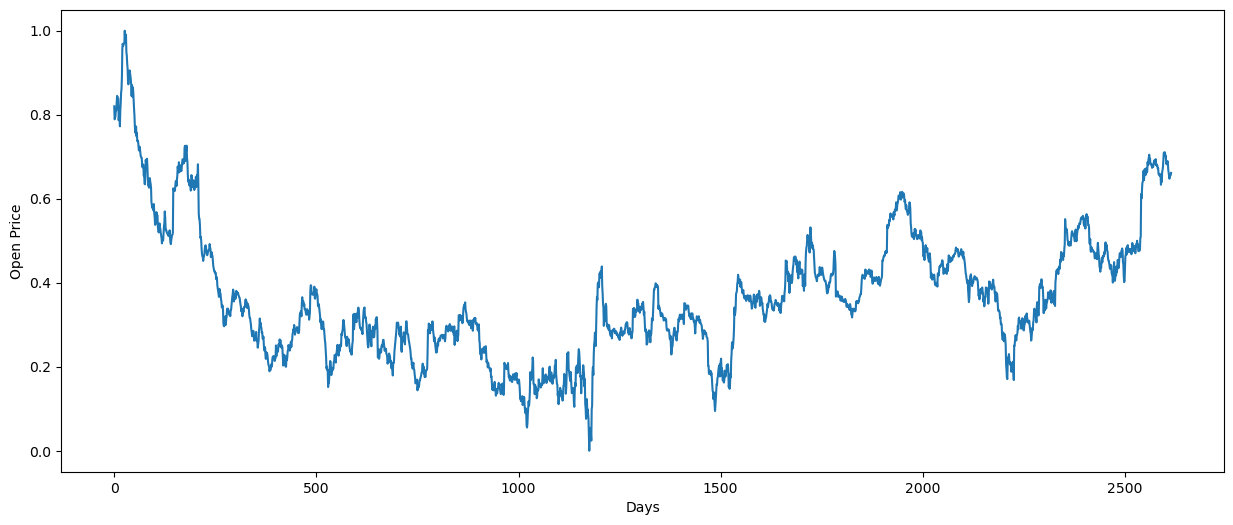

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

In [15]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2565, 50)
Shape of y_train before reshape : (2565,)


In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2565, 50, 1)
Shape of y_train after reshape : (2565, 1)


<a id="1"></a>
## 1. RNN model 

In [19]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error")

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 0.4131
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1613
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.1041
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0580
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0392
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0307
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0234
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0172
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0141
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0122
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0109
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0087
Epoch 13/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0070
Epoch 14/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0070
Epoch 15/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0061
Epo

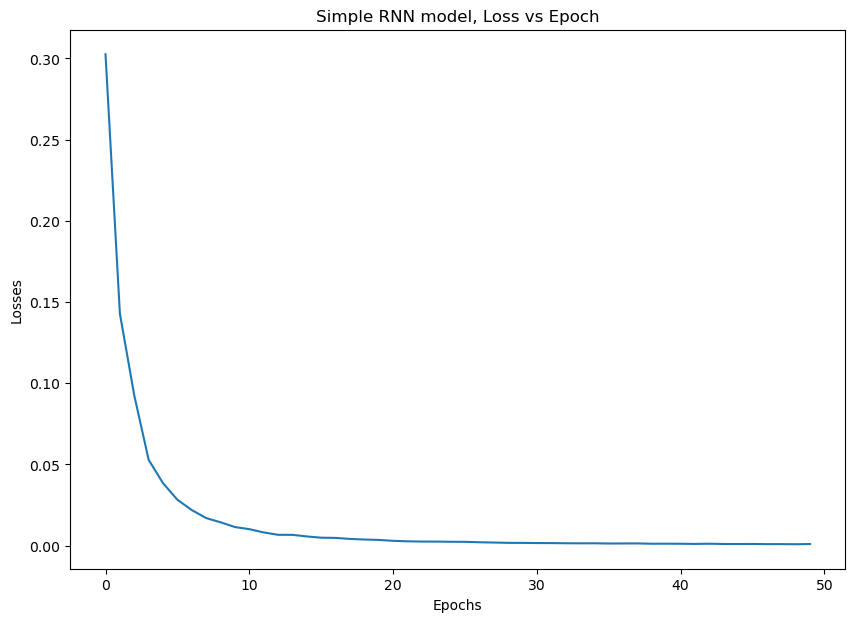

In [20]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [21]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step


(2565, 1)

In [22]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(2565, 1)

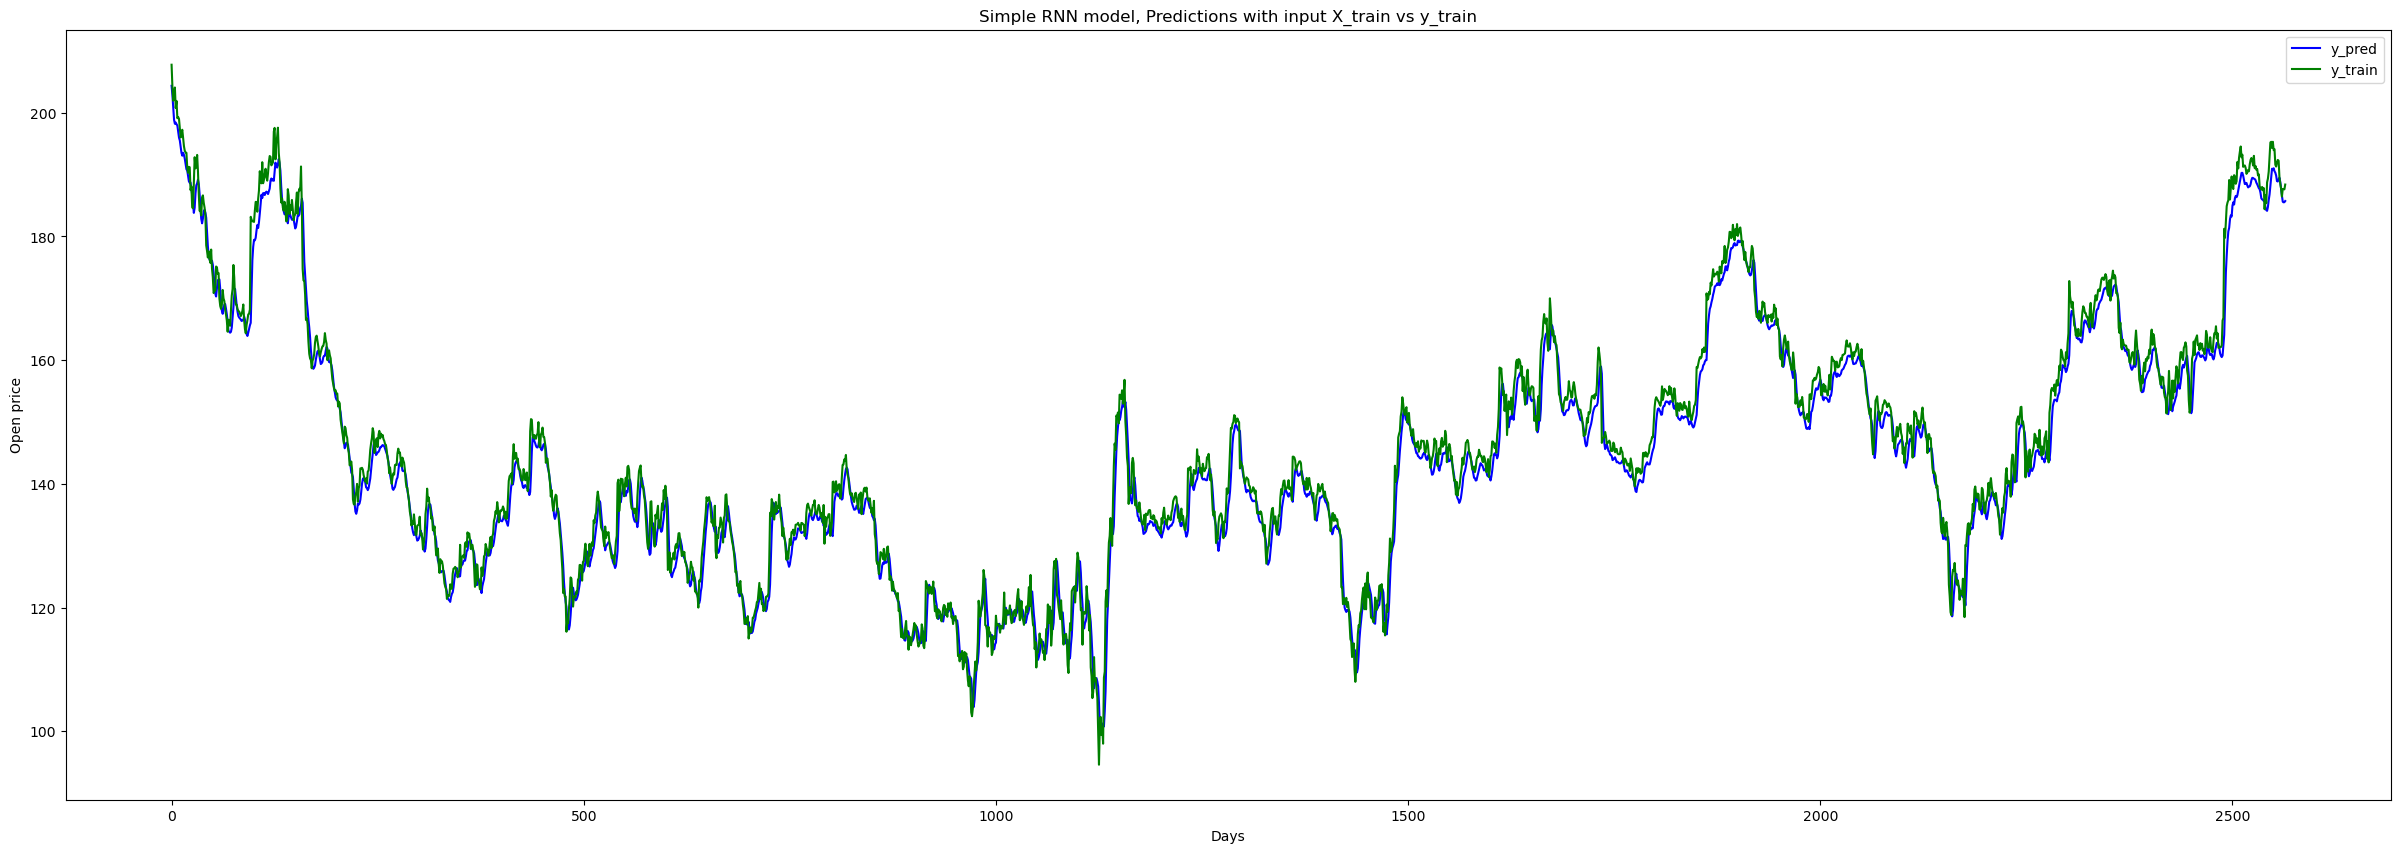

In [23]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [24]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (1121, 1)


In [25]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [26]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [27]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (1071, 50)
Shape of y_test before reshape : (1071,)


In [28]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (1071, 50, 1)
Shape of y_test after reshape : (1071, 1)


In [32]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Shape of y_pred_of_test : (1071, 1)


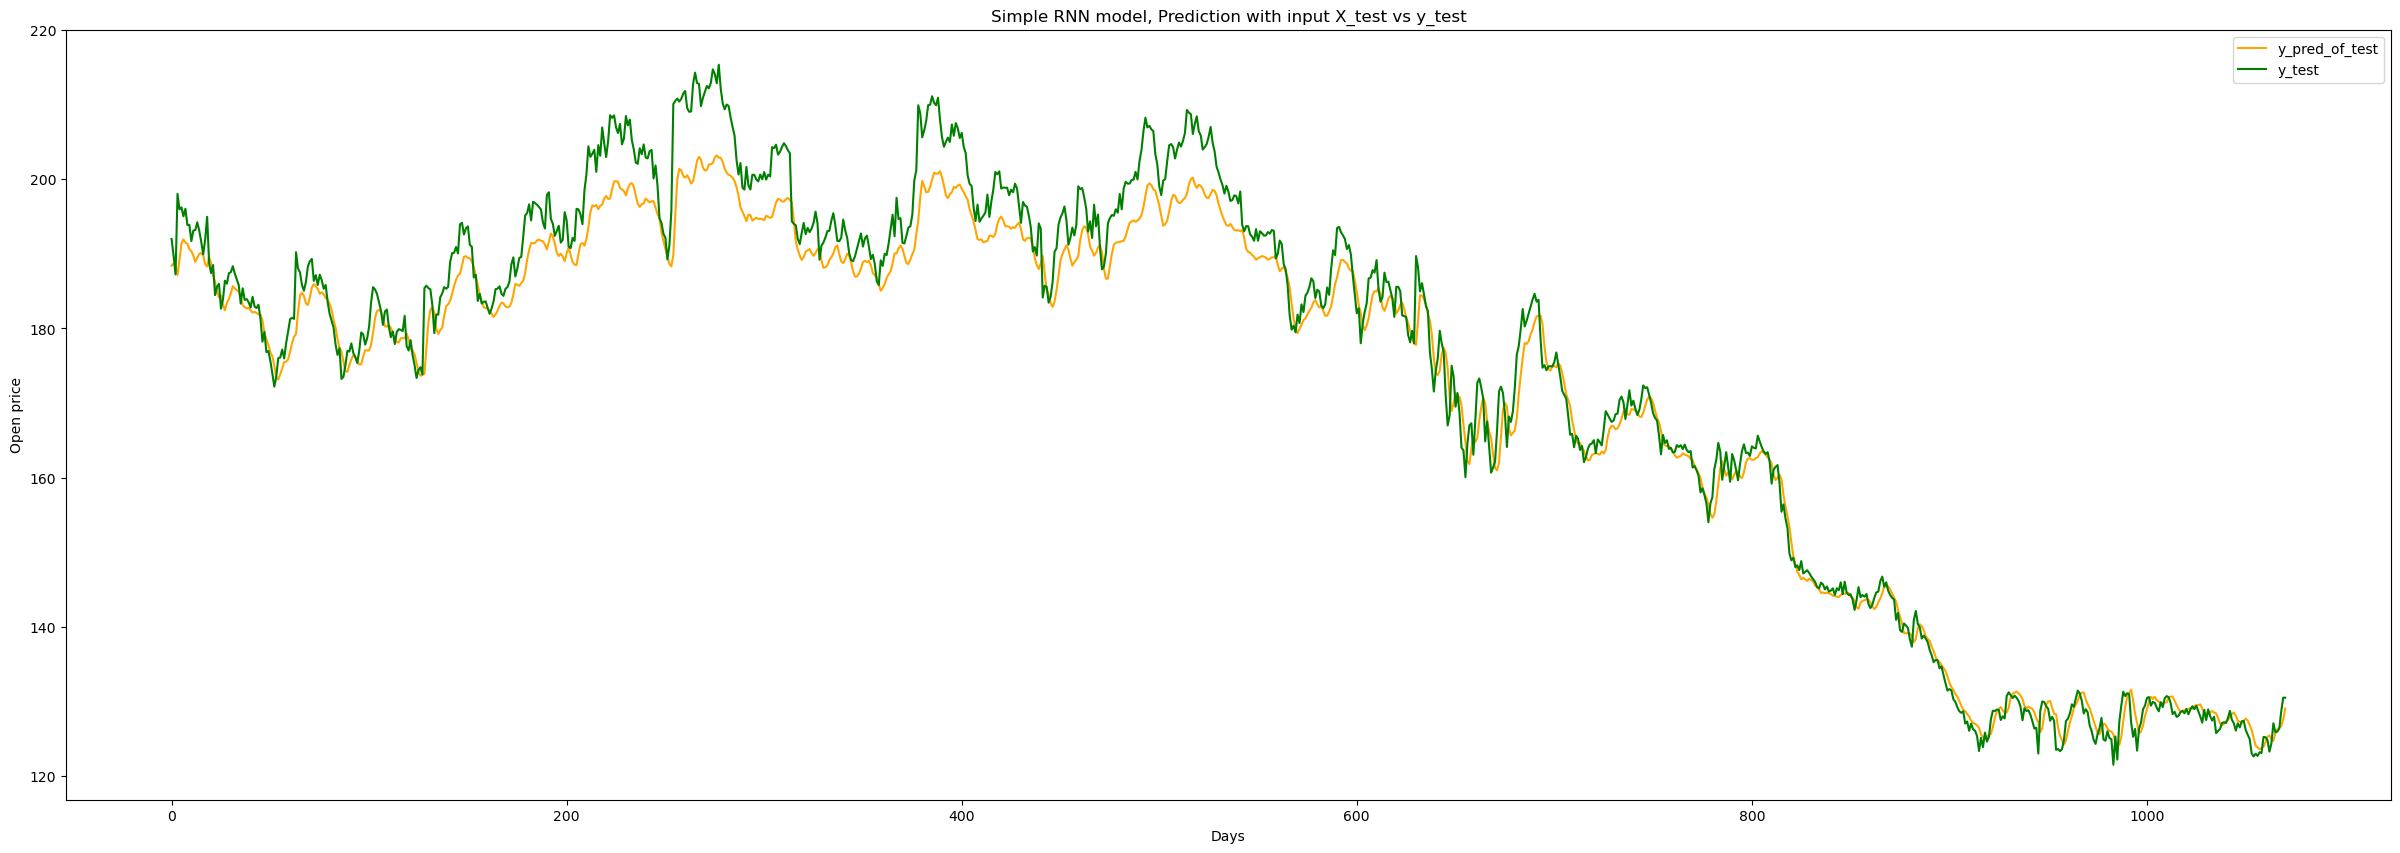

In [33]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

<a id="2"></a>
## 2. LSTM Model

In [42]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [43]:
# Garder seulement la colonne 'Open' (variable cible)
data = data[['Open']]

In [44]:
# Prétraiter les données : normalisation avec MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Fonction pour créer des séquences de données (X) et les labels (y)
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Définir la longueur de la séquence
sequence_length = 60  # Utilisation des 60 jours précédents pour prédire le prochain


In [45]:
# Créer les séquences et diviser en ensembles d'entraînement et de test
X, y = create_sequences(scaled_data, sequence_length)

# Redimensionner X pour qu'il soit compatible avec LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
### Développement d'un modèle LSTM complexe ###
model = Sequential()

# Première couche LSTM avec Dropout
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Deuxième couche LSTM avec Dropout
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Troisième couche LSTM avec Dropout
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Couche dense de sortie
model.add(Dense(units=1))

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - loss: 0.0238 - val_loss: 0.0021
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 0.0014 - val_loss: 8.9572e-04
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0014 - val_loss: 8.9388e-04
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 0.0014 - val_loss: 7.8610e-04
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0013 - val_loss: 9.1498e-04
Epoch 12/50
93/93 ━━━━━━━

In [48]:
### Évaluation et prédiction ###
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Inverser la normalisation pour avoir les vraies valeurs de prix
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error (MSE) : {mse}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step
Mean Squared Error (MSE) : 6.6330327825203685


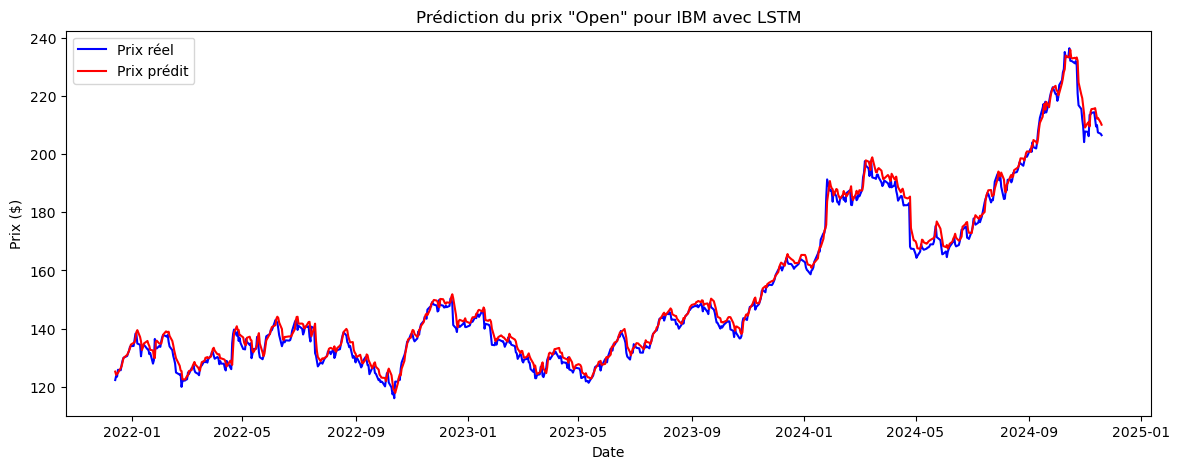

In [49]:
# Visualiser les résultats
plt.figure(figsize=(14, 5))
plt.plot(data.index[train_size+sequence_length:], y_test_original, color='blue', label='Prix réel')
plt.plot(data.index[train_size+sequence_length:], y_pred_original, color='red', label='Prix prédit')
plt.title('Prédiction du prix "Open" pour IBM avec LSTM')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.legend()
plt.show()

In [50]:
# Sauvegarder le modèle
model.save('model.keras')
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !


<a id="3"></a>
## 3. Utilisation du model LSTM pour la prediction en temps reel

In [51]:
from tensorflow.keras.models import load_model
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Charger le modèle entraîné
model = load_model('model.keras')
print("Modèle chargé avec succès !")

# Initialiser le scaler utilisé lors de l'entraînement
scaler = MinMaxScaler()

Modèle chargé avec succès !


[*********************100%***********************]  1 of 1 completed


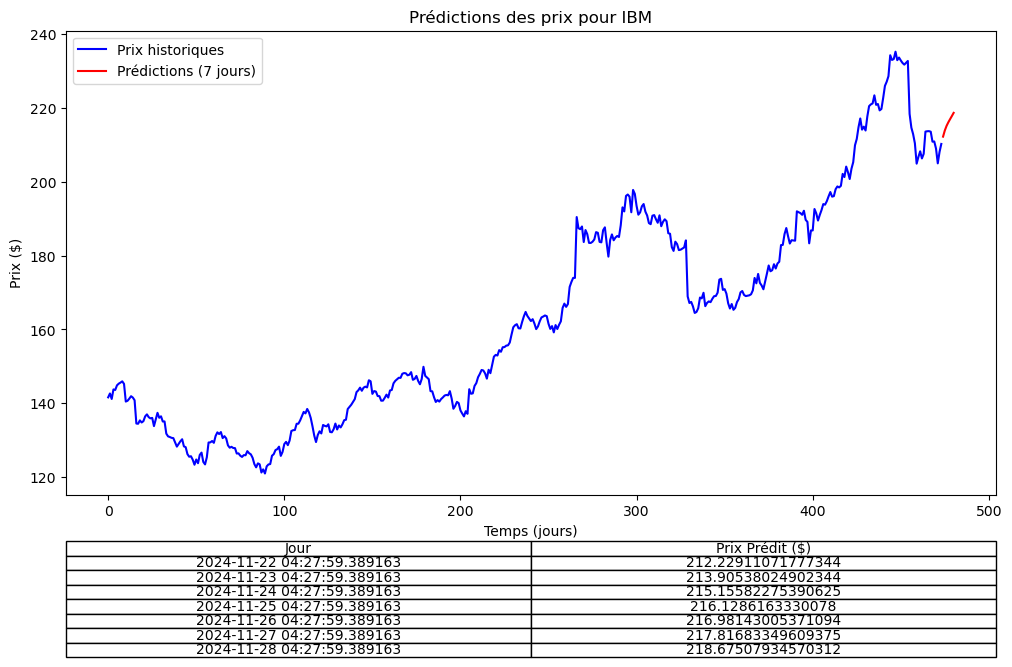

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# Charger les données historiques
data = yf.download('IBM', start='2023-01-01', end='2024-11-20')['Close'].values
data = data.reshape(-1, 1)

# Normalisation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Charger le modèle entraîné
model = load_model('model.keras')

# Initialisation des séquences avec des données historiques
sequence_length = 50
initial_sequence = scaled_data[-sequence_length:]  # Derniers 50 prix
current_sequence = initial_sequence.reshape(1, sequence_length, 1)

# Fonction pour prédire les 7 prochains jours
def predict_next_week(model, sequence, scaler, days=7):
    predictions = []
    current_seq = sequence.copy()
    for _ in range(days):
        predicted_scaled = model.predict(current_seq, verbose=0)[0, 0]
        predictions.append(predicted_scaled)
        # Ajouter la prédiction au bout de la séquence et faire glisser
        current_seq = np.append(current_seq[0, 1:, :], [[predicted_scaled]], axis=0).reshape(1, -1, 1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Tableau pour stocker les prédictions
prediction_table = pd.DataFrame(columns=["Jour", "Prix Prédit ($)"])

# Initialisation du graphique
plt.ion()
fig, ax = plt.subplots(figsize=(12, 8))

while True:
    # Prédire les 7 prochains jours
    predicted_week = predict_next_week(model, current_sequence, scaler, days=7)

    # Créer les dates associées aux prédictions
    last_date = pd.Timestamp.now()
    prediction_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]

    # Ajouter les prédictions au tableau
    new_predictions = pd.DataFrame({
        "Jour": prediction_dates,
        "Prix Prédit ($)": predicted_week
    })
    prediction_table = pd.concat([prediction_table, new_predictions], ignore_index=True)

    # Afficher les prédictions et les prix historiques
    ax.clear()
    ax.plot(data.flatten(), label="Prix historiques", color="blue")
    ax.plot(range(len(data), len(data) + 7), predicted_week, label="Prédictions (7 jours)", color="red")
    ax.set_title("Prédictions des prix pour IBM")
    ax.set_xlabel("Temps (jours)")
    ax.set_ylabel("Prix ($)")
    ax.legend()

    # Ajouter le tableau au graphique
    ax_table = plt.table(cellText=new_predictions.values,
                         colLabels=new_predictions.columns,
                         cellLoc='center',
                         loc='bottom',
                         bbox=[0.0, -0.35, 1.0, 0.25])
    ax_table.auto_set_font_size(False)
    ax_table.set_fontsize(10)

    plt.subplots_adjust(bottom=0.3)  # Ajuster l'espace pour inclure le tableau
    plt.draw()
    plt.pause(0.1)  # Pause pour actualiser le graphique

    # Sauvegarder dans un fichier CSV (optionnel)
    prediction_table.to_csv("predictions_ibm.csv", index=False)

    # Rafraîchir toutes les 24 heures
    time.sleep(86400)

In [1]:
pip install streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.6 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.2/8.6 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.4/8.6 MB 2.2 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.6 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/8.6 MB 2.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.6 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.6 MB 2.4 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/8.6 MB 2.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.6 MB 2.9 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/8.6 MB 3.3 MB/s eta 0:00:03
   -------- ------------------------------- 1.9/8.6 MB 3.4 MB/s eta 0:00:03
   --------- -------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import streamlit as st
import yfinance as yf
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger le modèle LSTM
model = load_model('model.keras')

# Fonction pour obtenir les données Yahoo Finance
def get_data(ticker):
    data = yf.download(ticker, start='2023-01-01', end='2024-11-20')['Close']
    return data

# Interface Streamlit
st.title("Prédictions du prix des actions avec LSTM")

# Choisir le ticker
ticker = st.text_input("Entrez le symbole de l'action (ex: IBM)", value='IBM')
if ticker:
    # Récupérer les données
    data = get_data(ticker)
    st.write(f"Données historiques pour {ticker}")
    st.line_chart(data)

    # Préparer les données pour la prédiction
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    # Initialisation des séquences
    sequence_length = 50
    current_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)

    # Fonction de prédiction
    def predict_next_week(model, sequence, scaler, days=7):
        predictions = []
        current_seq = sequence.copy()
        for _ in range(days):
            predicted_scaled = model.predict(current_seq)[0, 0]
            predictions.append(predicted_scaled)
            current_seq = np.append(current_seq[0, 1:, :], [[predicted_scaled]], axis=0).reshape(1, -1, 1)
        return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

    # Prédictions
    if st.button('Prédire les 7 prochains jours'):
        predictions = predict_next_week(model, current_sequence, scaler)
        st.write("Prédictions pour la semaine prochaine :")
        st.write(predictions)

        # Afficher les prédictions
        fig, ax = plt.subplots()
        ax.plot(np.arange(len(data)), data, label='Données historiques')
        ax.plot(np.arange(len(data), len(data) + 7), predictions, label='Prédictions (7 jours)', color='red')
        ax.set_xlabel('Temps')
        ax.set_ylabel('Prix ($)')
        ax.legend()
        st.pyplot(fig)


2024-11-22 10:28:58.675 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:00.982 
  command:

    streamlit run C:\Users\hp\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-22 10:29:00.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:00.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:00.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:00.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:01.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-22 10:29:01.005 Session state does not fun